# Análisis de datos con Pandas

In [32]:
import pandas as pd

### 1. **Exploración inicial del dataset**

Primero cargamos el dataset de automóviles de los años 70. Tiene datos como el consumo de combustible, el peso, la cantidad de cilindros y el origen del auto.

In [44]:
df = pd.read_csv('cars.csv', delimiter=';', skiprows=[1])
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.0,11.5,70,US
2,Plymouth Satellite,NaN,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           403 non-null    float64
 2   Cylinders     406 non-null    int64  
 3   Displacement  405 non-null    float64
 4   Horsepower    404 non-null    float64
 5   Weight        405 non-null    float64
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    int64  
 8   Origin        406 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.7+ KB


Este dataset representa diferentes autos y sus características técnicas. Las columnas más interesantes a simple vista son el consumo (MPG), la potencia (horsepower), el peso y el país de origen. Algunas variables vienen con valores faltantes.

### 2. **Análisis de valores faltantes**

Vamos a ver cuántos datos faltan en cada columna:

In [22]:
df.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

Hay valores nulos en horsepower, mpg y origin. Para horsepower, que es clave en el análisis, voy a reemplazar los valores faltantes con la media. Es una decisión práctica porque no hay muchos faltantes y no queremos perder esos registros. En cambio, en origin, como hay pocos vacíos, directamente los elimino. Y en mpg, también uso la media.

In [23]:
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mean())
df['MPG'] = df['MPG'].fillna(df['MPG'].mean())
df = df.dropna(subset=['Origin'])

### 3. **Estadísticas descriptivas**

Ya con los datos más limpios, algunas estadísticas básicas.

In [40]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,405.000000,406.000000,405.000000,406.000000,406.000000
mean,23.096278,5.475369,194.509877,103.143564,2978.293827,15.519704,75.921182
std,8.384616,1.712160,104.911254,40.129902,847.750906,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.000000,13.700000,73.000000
50%,23.000000,4.000000,151.000000,93.500000,2815.000000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,125.000000,3620.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Ahora quiero ver cómo varía el consumo promedio (mpg) según el origen del auto. Saco el promedio de millas por galón (mpg) y caballos de fuerza (horsepower) por región.

In [46]:
df.groupby('Origin')[['MPG', 'Horsepower']].mean().round(2)

,MPG,Horsepower
Origin,,
Europe,26.75,78.78
Japan,30.45,79.84
US,19.72,117.51


También busco cuál es el auto con más y con menos potencia:

In [42]:
df[df['Horsepower'] == df['Horsepower'].max()]

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
123,Pontiac Grand Prix,16.0,8,400.0,230.0,4278.0,9.5,73,US


In [43]:
df[df['Horsepower'] == df['Horsepower'].min()]

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
38,Ford Pinto,25.0,4,98.0,0.0,2046.0,19.0,71,US
133,Ford Maverick,21.0,6,200.0,0.0,2875.0,17.0,74,US
337,Renault Lecar Deluxe,40.9,4,85.0,0.0,1835.0,17.3,80,Europe
343,Ford Mustang Cobra,23.6,4,140.0,0.0,2905.0,14.3,80,US
361,Renault 18i,34.5,4,100.0,0.0,2320.0,15.8,81,Europe
382,AMC Concord DL,23.0,4,151.0,0.0,3035.0,20.5,82,US


### 4. **Visualización de los datos**

Para ver mejor lo que está pasando, armo un par de gráficos. El primero es un histograma del consumo, que muestra cómo se distribuye entre todos los autos.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

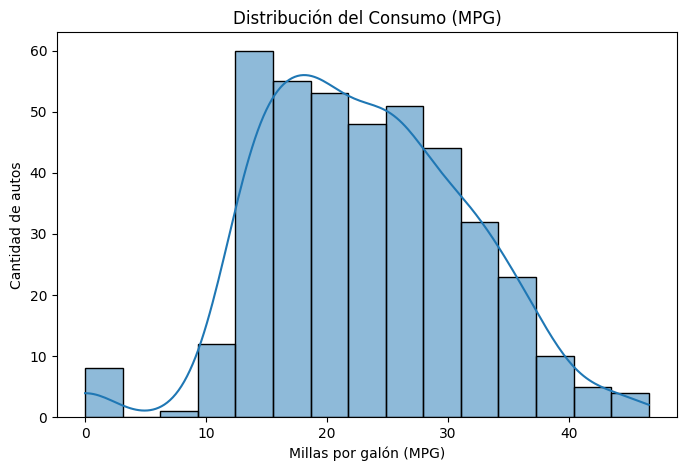

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MPG'], bins=15, kde=True)
plt.title('Distribución del Consumo (MPG)')
plt.xlabel('Millas por galón (MPG)')
plt.ylabel('Cantidad de autos')
plt.show()

Después hago un boxplot para comparar el peso de los autos según su origen. Así vemos si, por ejemplo, los autos americanos realmente son más pesados como suele decirse.

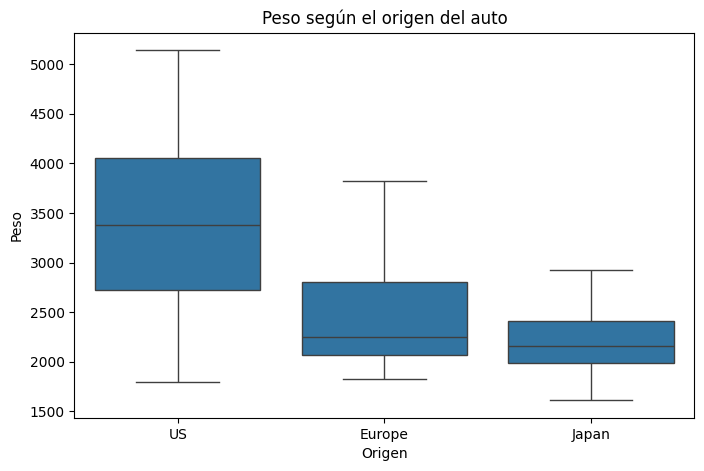

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Origin', y='Weight', data=df)
plt.title('Peso según el origen del auto')
plt.xlabel('Origen')
plt.ylabel('Peso')
plt.show()